In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eldonkakashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eldonkakashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eldonkakashi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Read the train data file
train_data = pd.read_csv('train_set.csv')

# Read the test data file
test_data = pd.read_csv('test_set.csv')

In [4]:
# Reset the index of the data
train_data.reset_index(drop=True, inplace=True)
# test_data.reset_index(drop=True, inplace=True)

In [5]:
train_data_copy = train_data.copy()

In [6]:
# Display the first few rows of the train data
print(train_data.head())

# Check the dimensions of the train data (number of rows, number of columns)
print(train_data.shape)

# # Check the data types of the columns
print(train_data.dtypes)

# # Check summary statistics of the numeric columns
print(train_data.describe())

# # Count the number of occurrences of each language in the train data
language_counts = train_data['text'].value_counts()
print(language_counts)

  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
(33000, 2)
lang_id    object
text       object
dtype: object
       lang_id                                               text
count    33000                                              33000
unique      11                                              29948
top        xho  ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq      3000                                                 17
text
ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwa

In [7]:
train_data = train_data.drop_duplicates(subset=['lang_id', 'text'], keep='first')

In [8]:
# Find duplicates
duplicates = train_data.duplicated()
duplicate_rows = train_data[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [lang_id, text]
Index: []


In [9]:

# Find rows with a high percentage of null values
null_percent = train_data.isnull().sum(axis=1) / train_data.shape[1] * 100
high_null_rows = train_data[null_percent > 90]
print("\nRows with > 90% Null Values:")
print(high_null_rows)


Rows with > 90% Null Values:
Empty DataFrame
Columns: [lang_id, text]
Index: []


In [10]:
test_data.tail(5)

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


### Class Distribution

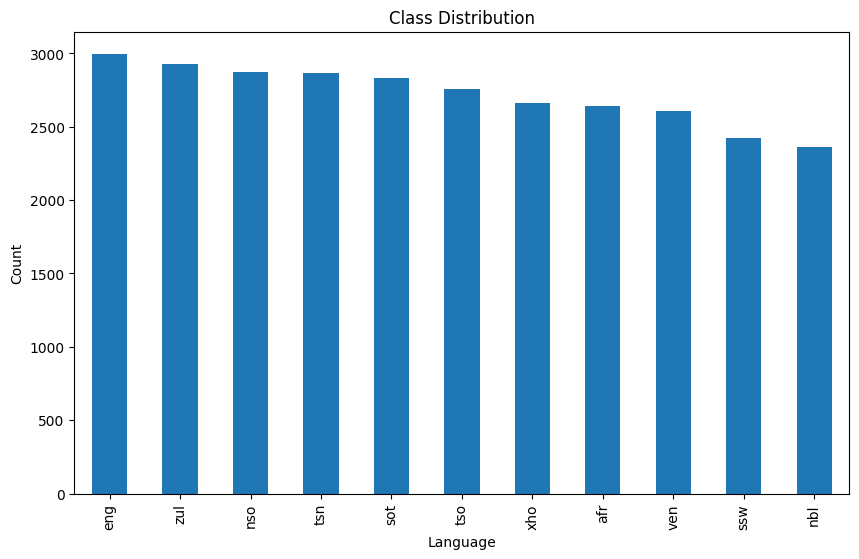

In [11]:
# Class Distribution
class_counts = train_data['lang_id'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

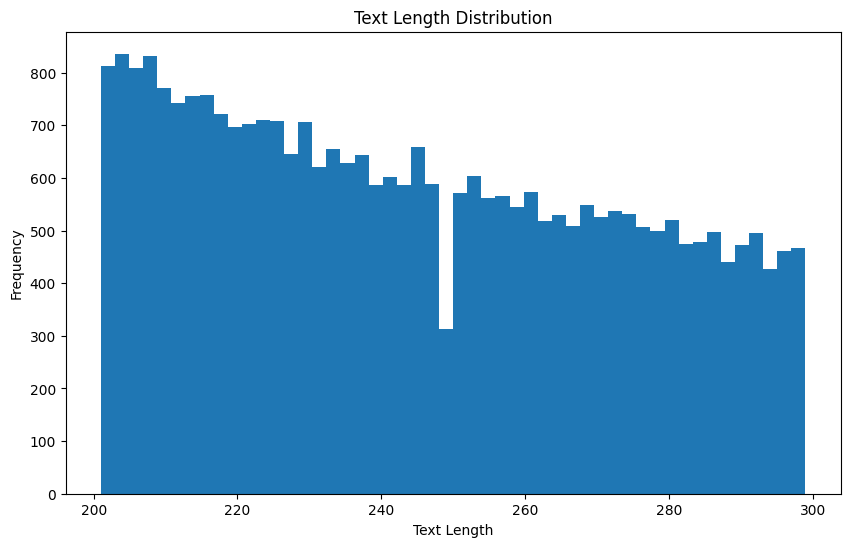

In [12]:
# Text Length Distribution
train_data['text_length'] = train_data['text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
plt.hist(train_data['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

In [13]:
# Word Frequency Analysis
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [14]:
def generate_language_wordclouds(data):
    # Get unique languages in the dataset
    languages = data['lang_id'].unique()

    # Create a grid of subplots based on the number of languages
    num_languages = len(languages)
    num_cols = 3
    num_rows = (num_languages + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Generate word cloud for each language
    for i, language in enumerate(languages):
        # Get texts for the current language
        texts = data[data['lang_id'] == language]['text']
        text_combined = ' '.join(texts)

        # Generate word cloud for the language
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text_combined)

        # Plot the word cloud in the corresponding subplot
        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(wordcloud, interpolation='bilinear')
        axes[row, col].set_title(language)
        axes[row, col].axis('off')

    # Hide any empty subplots
    if num_languages < num_rows * num_cols:
        for i in range(num_languages, num_rows * num_cols):
            axes[i // num_cols, i % num_cols].axis('off')

    # Adjust spacing and layout
    plt.tight_layout()

    # Show the combined word clouds
    plt.show()


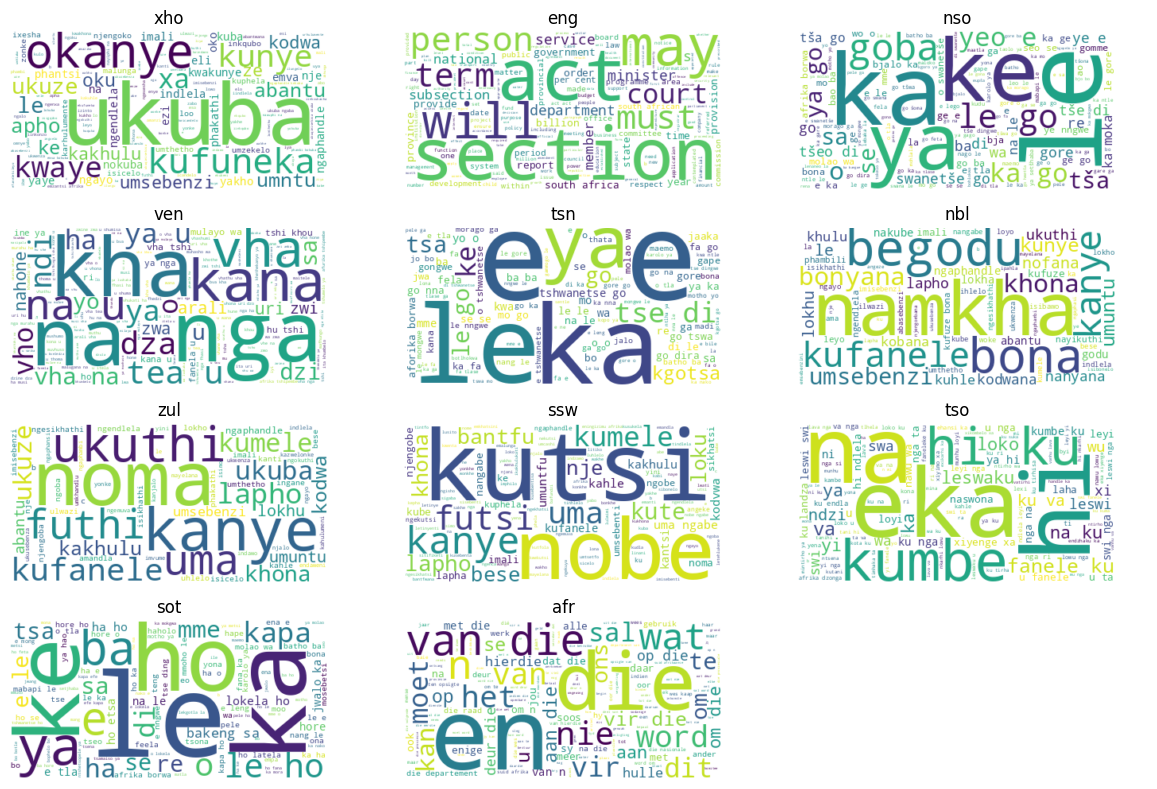

In [15]:
# Generate and display the language word clouds
generate_language_wordclouds(train_data)


In [16]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove punctuation and special characters
    table = str.maketrans('', '', string.punctuation)
    tokens = [token.translate(table) for token in tokens]
    
    # Replace 'š' with 's'
    tokens = [token.replace('š', 's') for token in tokens]
    
    # Get stop words for South African languages
    languages = ['english', 'zulu', 'xhosa', 'afrikaans', 'sotho_southern', 'ndebele_south', 'swati', 'venda', 'tsonga', 'tswana', 'sotho_northern', 'ndebele_north']
    stop_words = set(stopwords.words('english'))
    sa_stop_words = set()

    for language in languages:
        if language in stopwords.fileids():
            sa_stop_words.update(set(stopwords.words(language)))

    stop_words.update(sa_stop_words)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    
    # Remove extra whitespace
    tokens = [token.strip() for token in tokens if token.strip()]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text


In [17]:
# Apply text preprocessing to 'text' column
train_data['processed_text'] = train_data['text'].apply(preprocess_text)

In [18]:
# Display the preprocessed data
print(train_data[['lang_id', 'processed_text']].head())

  lang_id                                     processed_text
0     xho  umgaqosiseko wenza amalungiselelo kumaziko axh...
1     xho  idha iya kuba nobulumko bokubeka umsebenzi nap...
2     eng  province kwazulunatal department transport inv...
3     nso  netefatsa gore ba file dilo ka moka tse le dum...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [19]:
def get_word_count(text):
    tokens = word_tokenize(text)
    return len(tokens)

In [20]:
def get_average_word_length(text):
    tokens = word_tokenize(text)
    total_length = sum(len(token) for token in tokens)
    return total_length / len(tokens) if len(tokens) > 0 else 0

In [21]:
# Apply linguistic feature extraction functions to create new columns
train_data['word_count'] = train_data['processed_text'].apply(get_word_count)
train_data['average_word_length'] = train_data['processed_text'].apply(get_average_word_length)

# Display the updated dataset
print(train_data[['lang_id', 'processed_text', 'word_count', 'average_word_length']].head())

  lang_id                                     processed_text  word_count  \
0     xho  umgaqosiseko wenza amalungiselelo kumaziko axh...          24   
1     xho  idha iya kuba nobulumko bokubeka umsebenzi nap...          31   
2     eng  province kwazulunatal department transport inv...          23   
3     nso  netefatsa gore ba file dilo ka moka tse le dum...          33   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...          42   

   average_word_length  
0             8.166667  
1             7.096774  
2             8.043478  
3             5.151515  
4             4.666667  


In [22]:
# Define the number of common words to consider
num_common_words = 10

# Tokenize and count word frequencies for each text
word_frequencies = []
for text in train_data['processed_text']:
    tokens = word_tokenize(text)
    word_frequencies.append(Counter(tokens))

# Find the most common words
common_words = []
for frequencies in word_frequencies:
    common_words.append([word for word, count in frequencies.most_common(num_common_words)])

# Create a column for common words in train data
train_data['common_words'] = common_words

# Display the updated dataset
print(train_data[['lang_id', 'common_words']].head())


  lang_id                                       common_words
0     xho  [ikomishoni, umgaqosiseko, wenza, amalungisele...
1     xho  [idha, iya, kuba, nobulumko, bokubeka, umseben...
2     eng  [bridge, construction, tugela, province, kwazu...
3     nso  [go, ka, la, netefatsa, gore, ba, file, dilo, ...
4     ven  [ya, u, ndinganyiso, mbeu, nga, khomishini, mu...


In [23]:
# Define the language groups and subgroups
language_groups = {
    'bantu': ['nbl', 'xho', 'zul', 'tsn', 'sot', 'ssw', 'ven', 'nso', 'tso'],
    'latin': ['eng', 'afr'],
    # TODO: add more
}

# Create language group column
train_data['language_group'] = train_data['lang_id'].apply(lambda x: next((k for k, v in language_groups.items() if x in v), 'other'))

# Create language subgroup column
# train_data['language_subgroup'] = train_data['lang_id'].apply(lambda x: next((k for k, v in language_groups.items() if x in v), 'other'))

# Print the updated train_data DataFrame
print(train_data.head())


  lang_id                                               text  text_length  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...          220   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...          252   
2     eng  the province of kwazulu-natal department of tr...          264   
3     nso  o netefatša gore o ba file dilo ka moka tše le...          217   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...          239   

                                      processed_text  word_count  \
0  umgaqosiseko wenza amalungiselelo kumaziko axh...          24   
1  idha iya kuba nobulumko bokubeka umsebenzi nap...          31   
2  province kwazulunatal department transport inv...          23   
3  netefatsa gore ba file dilo ka moka tse le dum...          33   
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...          42   

   average_word_length                                       common_words  \
0             8.166667  [ikomishoni, umgaqosiseko, 

In [24]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['processed_text'], train_data['lang_id'], test_size=0.2, random_state=42)

In [25]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

In [26]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_val_scaled = scaler.transform(X_val_tfidf)

In [27]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Make predictions on the validation set
y_pred = model.predict(X_val_tfidf)

In [29]:
# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print(f'Accuracy: {accuracy}', f'F1 score: {f1}', sep='\n')
print(classification_report(y_val, y_pred))

Accuracy: 0.9938230383973289
F1 score: 0.9938198936661142
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       0.99      0.97      0.98       473
         nso       1.00      1.00      1.00       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      0.99      0.99       481
         tsn       1.00      1.00      1.00       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.98      1.00      0.99       503
         zul       0.98      0.98      0.98       612

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



In [30]:
# Preprocess the test data
test_data['clean_text'] = test_data['text'].apply(preprocess_text)

In [31]:
test_data.tail(5)

,index,text,clean_text
5677,5678,You mark your ballot in private.,mark ballot private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,ge ka kgetha ka bowena go se somise mofani ka ...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",tb ke bokudi ba pmb mme morero tla lefella tlh...
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.,vakatjhela iwebhusayidi yethu kuwww


In [32]:
# Vectorize the test data
test_features = vectorizer.transform(test_data['clean_text'])

In [33]:
# print(test_features)

# print last row of test features
print(test_features[-2, 3])

0.0


In [34]:
# Scale the test data
test_features_scaled = scaler.transform(test_features)

In [35]:
# Make predictions
test_predictions = model.predict(test_features_scaled)

In [36]:
# Calculate the accuracy
# accuracy = accuracy_score(test_data['text'], test_predictions)
# print("Accuracy:", accuracy)

In [37]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'index': test_data['index'], 'lang_id': test_predictions})

In [38]:

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

In [39]:
# Initialize the classifiers
svm_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier()

In [40]:
# Train the classifiers
# svm_classifier.fit(X_train_tfidf, y_train)
# random_forest_classifier.fit(X_train_tfidf, y_train)
# knn_classifier.fit(X_train_tfidf, y_train)
# decision_tree_classifier.fit(X_train_tfidf, y_train)

In [41]:
# Predict the labels for the validation data
# svm_predictions = svm_classifier.predict(X_val_tfidf)
# random_forest_predictions = random_forest_classifier.predict(X_val_tfidf)
# knn_predictions = knn_classifier.predict(X_val_tfidf)
# decision_tree_predictions = decision_tree_classifier.predict(X_val_tfidf)

In [42]:
# Calculate accuracy scores
# svm_accuracy = accuracy_score(y_val, svm_predictions)
# random_forest_accuracy = accuracy_score(y_val, random_forest_predictions)
# knn_accuracy = accuracy_score(y_val, knn_predictions)
# decision_tree_accuracy = accuracy_score(y_val, decision_tree_predictions)

In [43]:
# Create a dictionary to store the models and their names
# models = {
#     "Logistic Regression": model,
#     "Support Vector Machine (SVM)": svm_classifier,
#     "Random Forest": random_forest_classifier,
#     "K-Nearest Neighbors (KNN)": knn_classifier,
#     "Decision Tree": decision_tree_classifier
# }

In [44]:
# Perform evaluations for all models
# train_predictions = svm_classifier.predict(X_train_tfidf)
# val_predictions = svm_classifier.predict(X_val_tfidf)
# print("Train Classification Report:")
# print(classification_report(y_train, train_predictions))
# print("Validation Classification Report:")
# print(classification_report(y_val, val_predictions))

In [45]:
# Predict test data using SVM model
# test_predictions = svm_model.predict(test_features)

In [46]:
# Create a submission file
# submission_df = pd.DataFrame({
#     'index': test_data['index'],
#     'lang_id': test_predictions
# })

In [47]:
# Save the submission file
# submission_df.to_csv('submission.csv', index=False)

In [48]:
# Define the hyperparameter grid
# param_dist = {
#     'C': uniform(loc=0.1, scale=0.9),
#     'kernel': ['rbf'],
#     'gamma': ['scale']
# }


In [49]:
# Create the SVM model
# svm = SVC()
# random_search = RandomizedSearchCV(svm, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
# random_search.fit(X_train_tfidf, y_train)
# # Get the best hyperparameters
# best_params = random_search.best_params_

# # Print the best hyperparameters
# print("Best Hyperparameters:", best_params)

In [50]:
# Use the best model for predictions
# best_model = random_search.best_params_
# test_predictions = random_search.predict(X_val_tfidf)
# accuracy = accuracy_score(y_val, test_predictions)
# f1 = f1_score(y_val, test_predictions, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [51]:
# best_model = random_search.best_estimator_
# test_predictions = best_model.predict(test_features)

# # Print the shapes of test_data and test_predictions
# print("test_data shape:", test_data.shape)
# print("test_predictions shape:", test_predictions.shape)

# # Create a DataFrame with the predicted language tags
# submission_df = pd.DataFrame({'index': test_data.index + 1, 'lang_id': test_predictions})

# # Print the shape of the submission DataFrame
# print("submission_df shape:", submission_df.shape)

# # Save the DataFrame to a CSV file
# submission_df.to_csv('submission.csv', index=False)


In [52]:
# test_predictions = best_model.predict(test_features)

In [53]:
# submission_df = pd.DataFrame({'index': test_data.index, 'lang_id': test_predictions})

In [54]:
# submission_df.to_csv('submission.csv', index=False)
